In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',200)

In [2]:
df = pd.read_csv('../US_births.csv', low_memory=False)

In [3]:
df = df.sample(n=100_000, random_state=42)

In [4]:
df.shape

(100000, 55)

In [5]:
df.drop(df[df['DBWT'].eq(9999)].index, inplace=True)

In [6]:
df.drop(df[df['BMI'].eq(99.9)].index, inplace=True)
df.drop(df[df['DBWT'].eq(9999)].index, inplace=True)
df.drop(df[df['WTGAIN'].eq(99)].index, inplace=True)
df.drop(df[df['PWgt_R'].eq(999)].index, inplace=True)
df['binary_sex'] = np.where(df['SEX'] == 'M', 1, 0)
df.drop(df[df['FAGECOMB'].eq(99)].index, inplace=True)
df['first_birth'] = np.where(df['ILLB_R'].eq(888), 1, 0)

In [7]:
df.shape

(85804, 57)

In [8]:
conditions = [df['CIG_0'].eq(0),
              df['CIG_0'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['smoked'] = np.select(conditions, choices, 'Daily')

In [9]:
conditions = [df['PRIORDEAD'].eq(0),
              df['PRIORDEAD'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['PRIORDEAD_cat'] = np.select(conditions, choices, 'Yes')

In [10]:
conditions = [df['PRIORTERM'].eq(0),
              df['PRIORTERM'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['PRIORTERM_cat'] = np.select(conditions, choices, 'Yes')

In [11]:
conditions = [df['PRIORLIVE'].eq(0),
              df['PRIORLIVE'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['PRIORLIVE_cat'] = np.select(conditions, choices, 'Yes')

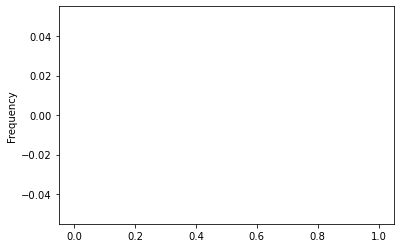

In [12]:
df[df['WTGAIN'].eq(99)]['BMI'].plot(kind='hist')

In [13]:
df.shape

(85804, 61)

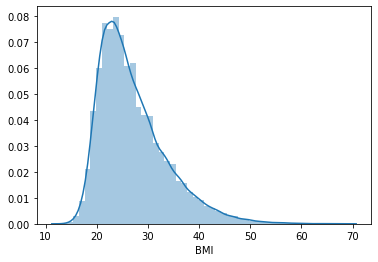

In [14]:
sns.distplot(df['BMI'])

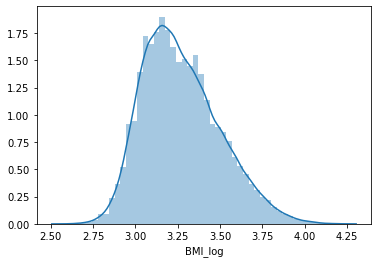

In [15]:
df['BMI_log'] = np.log(df['BMI'])
sns.distplot(df['BMI_log'])

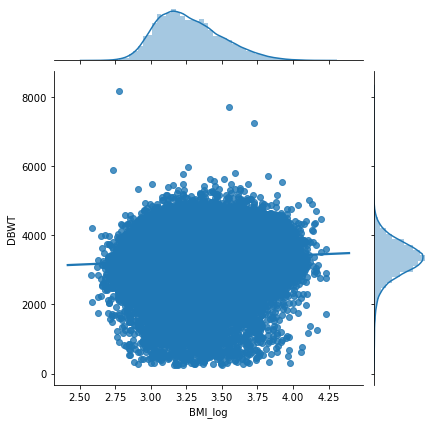

In [16]:
sns.jointplot(x='BMI_log', y= 'DBWT', data =df, kind='reg')

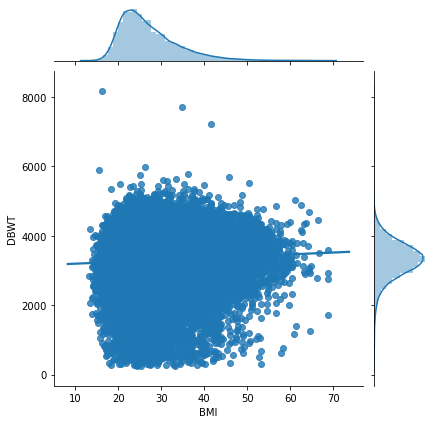

In [17]:
sns.jointplot(x='BMI', y= 'DBWT', data =df, kind='reg')

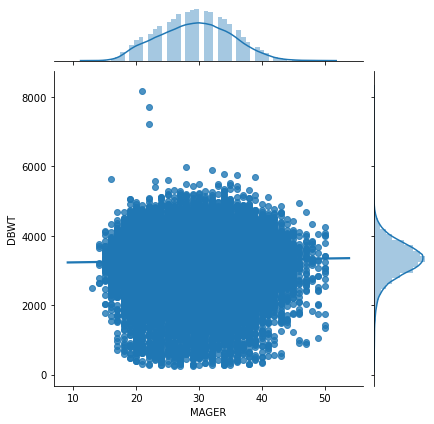

In [18]:
sns.jointplot(x='MAGER', y= 'DBWT', data =df, kind='reg')

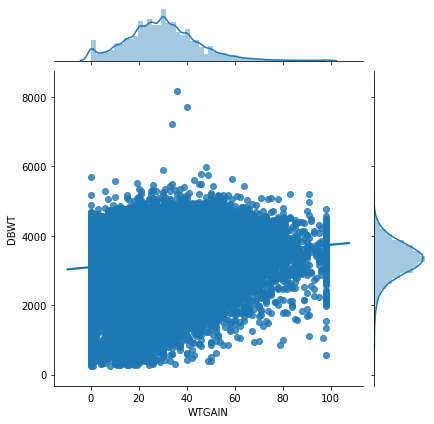

In [19]:
sns.jointplot(x='WTGAIN', y= 'DBWT', data =df, kind='reg')

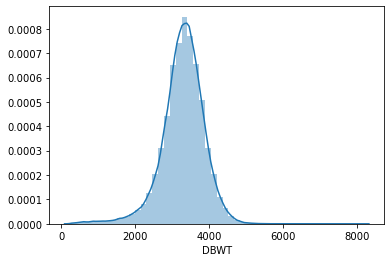

In [20]:
sns.distplot(df['DBWT'])

In [21]:
df['SEX'].unique()

array(['F', 'M'], dtype=object)

In [22]:
_M_df = df[df['SEX'].eq('M')]
_F_df = df[df['SEX'].eq('F')]

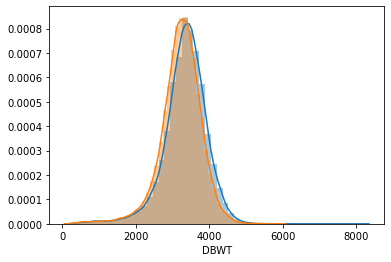

In [23]:
sns.distplot(_M_df['DBWT'])
sns.distplot(_F_df['DBWT'])

In [24]:
from statsmodels.formula.api import ols
formula = 'DBWT~binary_sex'
model = ols(formula=formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DBWT   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     908.0
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          1.97e-198
Time:                        17:15:03   Log-Likelihood:            -6.6698e+05
No. Observations:               85804   AIC:                         1.334e+06
Df Residuals:                   85802   BIC:                         1.334e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3224.9878      2.813   1146.528      0.000    3219.475    3230.501
binary_sex   118.3388      3.927     30.133      0.000     110.641     126.036
==============================================================================
Omnibus:                    13652.131   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39533.358
Skew:                          -0.849   Prob(JB):                         0.00
Kurtosis:                       5.859   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
from scipy import stats
stats.f_oneway(_M_df['DBWT'], _F_df['DBWT'])

F_onewayResult(statistic=907.9886499804788, pvalue=1.9652764524556107e-198)

In [26]:
del _M_df
del _F_df

In [27]:
df['MRAVE6'].unique()

array([1, 2, 4, 3, 6, 5], dtype=int64)

In [28]:
_1_race = df[df['MRAVE6'].eq(1)]
_2_race = df[df['MRAVE6'].eq(2)]
_3_race = df[df['MRAVE6'].eq(3)]
_4_race = df[df['MRAVE6'].eq(4)]
_5_race = df[df['MRAVE6'].eq(5)]
_6_race = df[df['MRAVE6'].eq(6)]

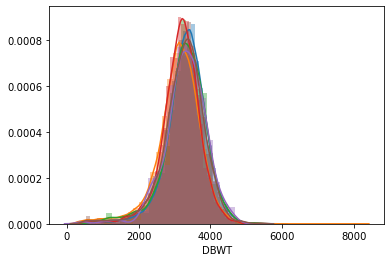

In [29]:
sns.distplot(_1_race['DBWT'])
sns.distplot(_2_race['DBWT'])
sns.distplot(_3_race['DBWT'])
sns.distplot(_4_race['DBWT'])
sns.distplot(_5_race['DBWT'])
sns.distplot(_6_race['DBWT'])

In [30]:
stats.f_oneway(_1_race['DBWT'], _2_race['DBWT'], _3_race['DBWT'], _4_race['DBWT'], _5_race['DBWT'], _6_race['DBWT'])

F_onewayResult(statistic=345.65160602265075, pvalue=0.0)

In [31]:
del _1_race
del _2_race
del _3_race
del _4_race
del _5_race
del _6_race

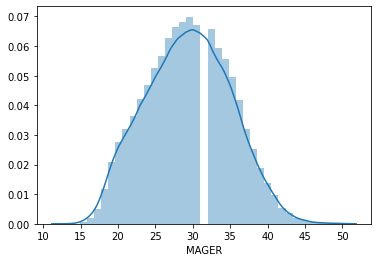

In [32]:
sns.distplot(df['MAGER'], bins = 39)

In [33]:
df.shape

(85804, 62)

In [34]:
df['NO_INFEC'].value_counts()

1    83908
0     1764
9      132
Name: NO_INFEC, dtype: int64

In [35]:
df['MRAVE6'].value_counts()

1    65374
2    11109
4     6270
6     2078
3      702
5      271
Name: MRAVE6, dtype: int64

In [36]:
df['PRIORTERM'].value_counts()

0     62226
1     15325
2      5155
3      1764
4       641
5       236
99      192
6       122
7        58
8        34
10       22
9        16
11        3
12        2
14        2
16        2
20        1
13        1
15        1
18        1
Name: PRIORTERM, dtype: int64

In [37]:
df['FRACE6'].value_counts()


1    59287
2    12100
9     6184
4     5357
6     2016
3      608
5      252
Name: FRACE6, dtype: int64

In [38]:
df['SEX'].value_counts()

M    44017
F    41787
Name: SEX, dtype: int64

In [39]:
df['PAY'].value_counts()

2    45944
1    32371
3     3680
8     1587
5     1160
6      640
9      370
4       52
Name: PAY, dtype: int64

In [40]:
df['DMAR'].unique()

array(['1', '2', ' '], dtype=object)

In [41]:
df['LD_INDL'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [42]:
df['RF_CESAR'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [43]:
df['NO_RISKS'].unique()

array([1, 0, 9], dtype=int64)

In [44]:
df['NO_MMORB'].unique()

array([1, 0, 9], dtype=int64)

In [45]:
df['MAGE_IMPFLG'].unique()

array([' ', '1'], dtype=object)

In [46]:
df['ILLB_R'].value_counts()

888    32554
999     2442
24      1212
22      1191
23      1185
       ...  
295        1
270        1
277        1
242        1
293        1
Name: ILLB_R, Length: 279, dtype: int64

In [47]:
df['ILP_R'].value_counts()

888    26327
999     9764
12      1267
21      1223
24      1206
       ...  
270        1
252        1
268        1
266        1
284        1
Name: ILP_R, Length: 273, dtype: int64

In [48]:
df['first_birth'] = np.where(df['ILLB_R'].eq(888), 1, 0)

In [49]:
df['plural_delivery'] = np.where(df['ILLB_R'].lt(4), 'Yes', 0)

In [50]:
df['first_pregnancy'] = np.where(df['ILP_R'].eq(888), 1, 0)

In [51]:
len(df[df['ILLB_R'].lt(4)])

1118

In [52]:
len(df[df['ILOP_R'].lt(4)])

8

In [53]:
len(df[df['ILP_R'].lt(4)])

1022

In [54]:
len(df[df['ILLB_R'].eq(888)])

32554

In [55]:
len(df[df['ILOP_R'].eq(888)])

62226

In [56]:
len(df[df['ILP_R'].eq(888)])

26327

In [57]:
df['first_natal'] = np.where(df['ILOP_R'].eq(888),1, 0)

In [58]:
df['first_birth'].value_counts()

0    53250
1    32554
Name: first_birth, dtype: int64

In [59]:
df['plural_delivery'].value_counts()

0      84686
Yes     1118
Name: plural_delivery, dtype: int64

In [60]:
df['PRECARE'] = np.where(df['PRECARE'].eq(99), 0, df['PRECARE'])
df['PRECARE'].value_counts()

2     35357
3     26838
4      7206
1      5109
5      3562
0      2501
6      2041
7      1605
8      1154
9       419
10       12
Name: PRECARE, dtype: int64

In [61]:
df['PREVIS'] = np.where(df['PREVIS'].eq(99), 0, df['PREVIS'])

In [62]:
df['PRIORLIVE_cat'].value_counts()

Yes        53013
None       32698
Unknown       93
Name: PRIORLIVE_cat, dtype: int64

In [63]:
df['PWgt_R'].value_counts()

130    3563
140    3211
150    3180
135    2764
120    2682
       ... 
349       1
78        1
369       1
373       1
367       1
Name: PWgt_R, Length: 298, dtype: int64

In [64]:
df['WTGAIN'].value_counts()

30    4229
20    3127
25    2987
35    2784
40    2612
32    2381
28    2340
33    2326
0     2307
27    2284
31    2221
23    2211
24    2195
22    2182
26    2172
29    2102
34    2099
36    1908
21    1822
37    1717
15    1706
38    1693
18    1580
19    1489
39    1484
45    1473
17    1419
16    1334
42    1312
41    1292
10    1235
14    1172
43    1157
50    1116
44    1097
13    1076
12    1036
46     921
11     906
47     809
48     794
49     672
8      669
9      665
55     589
6      567
5      561
7      544
52     523
51     512
53     454
4      449
54     439
60     428
2      383
3      382
56     339
1      329
57     310
58     307
59     225
65     224
62     218
61     181
70     173
63     147
64     144
98     125
66     112
67     110
68     103
75      81
69      80
71      62
72      60
80      59
73      58
76      42
74      42
78      37
77      34
83      26
81      25
85      25
82      21
79      21
90      20
88      18
86      16
95      15
84      14

In [65]:
df['MAGER^2'] = df['MAGER'] ** 2

In [66]:
df['35AGE_older'] = np.where(df['MAGER'].gt(34), 1, 0)

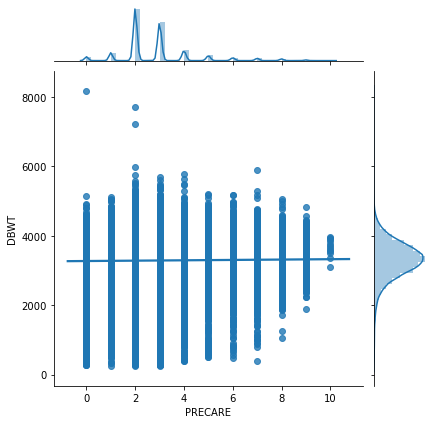

In [67]:
sns.jointplot(x='PRECARE', y='DBWT', data=df,kind='reg')

In [68]:
X = df[['ATTEND','BFACIL', 'BMI','smoked', 'DOB_MM', 'DMAR','FAGECOMB','FHISPX','FEDUC', 'FRACE6', 'first_birth', 'plural_delivery', 'first_pregnancy', 'plural_delivery', 'first_natal',
        'IP_GON', 'LD_INDL', 'MAGER', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN',
        'NO_INFEC','NO_MMORB','NO_RISKS','PAY', 'PAY_REC','PRECARE','PREVIS', 'PRIORDEAD_cat', 'PRIORLIVE_cat', 'PRIORTERM_cat', 'PWgt_R', 'BMI_log','M_Ht_In',
        'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX', 'WTGAIN'
]]
_X = pd.get_dummies(X, columns=['ATTEND', 'BFACIL','smoked', 'DOB_MM','DMAR','FHISPX','FEDUC','FRACE6', 'plural_delivery',
                                'IP_GON','LD_INDL', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN',
                                'NO_INFEC','NO_MMORB','NO_RISKS', 'PAY', 'PAY_REC','PRIORDEAD_cat', 'PRIORLIVE_cat','PRIORTERM_cat',
                                'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX'])
y = df['DBWT']

In [69]:
# _X['DBWT'] = y


In [70]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy='median')
dummy_regr.fit(_X,y)


DummyRegressor(constant=None, quantile=None, strategy='median')

In [71]:
_dummy_y = dummy_regr.predict(X)

In [72]:
np.sqrt(metrics.mean_squared_error(y, _dummy_y))

579.0395785602474

In [73]:
df['M_Ht_In'].value_counts()

64    12832
63    11210
62    10909
65    10249
66     9432
67     7645
61     6139
60     4604
68     4235
69     2783
59     1902
70     1389
71      726
58      454
57      394
72      361
56      157
73       88
74       69
55       61
54       38
78       21
53       21
48       16
75       14
50       11
49       10
52       10
76        9
77        8
51        6
46        1
Name: M_Ht_In, dtype: int64

In [74]:
df['smoked'].value_counts()

None       79566
Daily       5986
Unknown      252
Name: smoked, dtype: int64

In [75]:
list(_X.columns)

['BMI',
 'FAGECOMB',
 'first_birth',
 'first_pregnancy',
 'first_natal',
 'MAGER',
 'PRECARE',
 'PREVIS',
 'PWgt_R',
 'BMI_log',
 'M_Ht_In',
 'WTGAIN',
 'ATTEND_1',
 'ATTEND_2',
 'ATTEND_3',
 'ATTEND_4',
 'ATTEND_5',
 'ATTEND_9',
 'BFACIL_1',
 'BFACIL_2',
 'BFACIL_3',
 'BFACIL_4',
 'BFACIL_5',
 'BFACIL_6',
 'BFACIL_7',
 'BFACIL_9',
 'smoked_Daily',
 'smoked_None',
 'smoked_Unknown',
 'DOB_MM_1',
 'DOB_MM_2',
 'DOB_MM_3',
 'DOB_MM_4',
 'DOB_MM_5',
 'DOB_MM_6',
 'DOB_MM_7',
 'DOB_MM_8',
 'DOB_MM_9',
 'DOB_MM_10',
 'DOB_MM_11',
 'DOB_MM_12',
 'DMAR_ ',
 'DMAR_1',
 'DMAR_2',
 'FHISPX_0',
 'FHISPX_1',
 'FHISPX_2',
 'FHISPX_3',
 'FHISPX_4',
 'FHISPX_5',
 'FHISPX_6',
 'FHISPX_9',
 'FEDUC_1',
 'FEDUC_2',
 'FEDUC_3',
 'FEDUC_4',
 'FEDUC_5',
 'FEDUC_6',
 'FEDUC_7',
 'FEDUC_8',
 'FEDUC_9',
 'FRACE6_1',
 'FRACE6_2',
 'FRACE6_3',
 'FRACE6_4',
 'FRACE6_5',
 'FRACE6_6',
 'FRACE6_9',
 'plural_delivery_0',
 'plural_delivery_Yes',
 'plural_delivery_0',
 'plural_delivery_Yes',
 'IP_GON_N',
 'IP_GON_U',
 

In [76]:
df['PRECARE'].value_counts()

2     35357
3     26838
4      7206
1      5109
5      3562
0      2501
6      2041
7      1605
8      1154
9       419
10       12
Name: PRECARE, dtype: int64

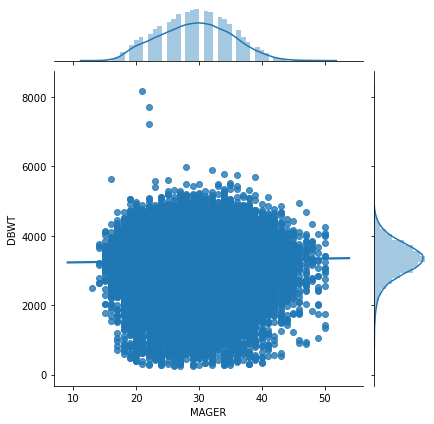

In [77]:
sns.jointplot(x='MAGER',y='DBWT', data=df,kind='reg')

In [78]:
df['DBWT_sqrt'] = np.sqrt(df['DBWT'])

In [79]:
df['smoked']

2745564     None
3083465     None
64636       None
1898366     None
1837169     None
           ...  
1418357     None
148545      None
3393158     None
3150640     None
249013     Daily
Name: smoked, Length: 85804, dtype: object

In [84]:
df['DLMP_MM'].value_counts()

12    7488
11    7192
10    7167
9     6983
8     6922
6     6887
1     6859
7     6747
5     6676
3     6676
4     6555
2     6358
99    3294
Name: DLMP_MM, dtype: int64

In [86]:
df.drop(df[df['DLMP_MM'].eq(99)].index, inplace=True)

In [88]:
df['DOB_MM'].value_counts()

8     7432
9     7173
7     7139
6     7022
5     7013
10    6957
3     6889
12    6780
1     6745
11    6667
4     6606
2     6087
Name: DOB_MM, dtype: int64

In [97]:
df.drop(df[df['DLMP_YY'].eq(9999)].index, inplace=True)

In [98]:
df['DLMP_YY'].value_counts()

2017    62179
2018    20274
2016       44
Name: DLMP_YY, dtype: int64

In [99]:
df['DOB_YY'].value_counts()

2018    82497
Name: DOB_YY, dtype: int64

In [100]:
df[df['DLMP_YY'].eq(2016)]

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,DOB_WK,DOB_YY,DWgt_R,FAGECOMB,FEDUC,FHISPX,FRACE15,FRACE31,FRACE6,ILLB_R,ILOP_R,ILP_R,IMP_SEX,IP_GON,LD_INDL,MAGER,MAGE_IMPFLG,MAR_IMP,MBSTATE_REC,MEDUC,MHISPX,MM_AICU,MRACE15,MRACE31,MRACEIMP,MRAVE6,MTRAN,M_Ht_In,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,binary_sex,first_birth,smoked,PRIORDEAD_cat,PRIORTERM_cat,PRIORLIVE_cat,BMI_log,plural_delivery,first_pregnancy,first_natal,MAGER^2,35AGE_older,DBWT_sqrt,pregnancy_length
3518532,1,1,23.6,0,2863,11,2016,1,1,512,7,2018,215,41,8,0,1,1,1,42,16,16,,N,Y,40,,,1,8,0,N,1,1,,1,N,68,1,1,0,2,2,3,11,0,1,1,155,1,1,N,0,M,60,1,0,None,None,Yes,Yes,3.161247,0,0,0,1600,1,53.507009,2
1473338,1,1,23.9,0,3671,8,2016,1,6,1809,4,2018,193,28,5,0,1,1,1,888,888,888,,N,Y,27,,,1,6,0,N,1,1,,1,N,66,1,1,1,2,2,2,14,0,0,0,148,1,2,N,0,M,45,1,1,None,None,None,None,3.173878,0,1,1,729,0,60.588778,10
3089215,1,1,22.3,0,3710,6,2016,1,4,526,3,2018,169,23,4,0,1,1,1,26,44,26,,N,N,23,,,1,4,0,N,1,1,,1,N,64,1,1,1,8,4,10,1,0,1,1,130,1,2,N,0,F,39,0,0,None,None,Yes,Yes,3.104587,0,0,0,529,0,60.909769,10
3416754,1,1,29.6,0,2775,10,2016,1,2,1706,5,2018,214,29,3,0,1,1,1,888,888,888,,N,Y,28,,,1,4,0,N,1,1,,1,N,67,1,1,1,2,2,4,13,0,0,0,189,1,1,N,0,F,25,0,1,None,None,None,None,3.387774,0,1,1,784,0,52.678269,4
123057,3,3,18.0,0,3884,7,2016,1,4,417,4,2018,136,63,5,0,1,1,1,47,888,47,,N,N,40,,,1,5,0,N,1,1,,1,N,64,1,1,1,3,3,3,13,0,7,0,105,1,1,N,0,M,31,1,0,None,None,None,Yes,2.890372,0,0,1,1600,1,62.321746,9
2041560,1,1,22.7,0,3402,12,2016,1,4,1244,4,2018,186,38,6,0,1,1,1,151,888,151,,N,N,41,,,2,6,0,N,1,1,,1,N,63,1,1,0,2,2,4,19,0,3,0,128,3,4,N,0,F,58,0,0,None,None,None,Yes,3.122365,0,0,1,1681,1,58.326666,4
3607920,2,1,21.5,0,3580,12,2016,1,3,1334,6,2018,174,29,5,0,1,1,1,888,888,888,,N,Y,29,,,1,6,0,N,1,1,,1,N,64,1,1,1,2,2,2,14,0,0,0,125,1,1,N,0,F,49,0,1,None,None,None,None,3.068053,0,1,1,841,0,59.833101,3
2687168,2,1,24.9,0,2910,2,2016,1,2,1957,4,2018,185,24,5,0,1,1,1,113,24,24,,N,N,36,,,1,4,0,N,1,1,,1,N,64,1,1,1,1,1,2,12,0,2,3,145,3,1,N,0,M,40,1,0,None,None,Yes,Yes,3.214868,0,0,0,1296,1,53.944416,12
74514,2,1,20.5,0,2916,8,2016,1,3,745,2,2018,150,33,3,0,1,1,1,100,888,100,,N,N,33,,,1,5,0,N,1,1,,1,N,65,1,1,1,1,1,2,12,0,2,0,123,3,1,N,0,F,27,0,0,None,None,None,Yes,3.020425,0,0,1,1089,0,54.000000,7
1563183,1,1,24.0,0,3565,12,2016,1,1,1211,5,2018,172,39,7,0,1,1,1,888,10,10,,N,Y,34,,,2,7,0,N,1,1,,1,N,64,1,1,1,2,2,2,15,0,0,1,140,1,2,N,0,M,32,1,1,None,None,Yes,None,3.178054,0,0,0,1156,0,59.707621,1


In [103]:
conditions = [(df['DOB_MM'] > df['DLMP_MM']) & (2018 == df['DLMP_YY']),
              (df['DOB_MM'] > df['DLMP_MM']) & (2018 > df['DLMP_YY']),
              (df['DOB_MM'] < df['DLMP_MM']) & (2018 > df['DLMP_YY'])
    
]
choices = [df['DOB_MM'] - df['DLMP_MM'],
           ((df['DOB_YY'] - df['DLMP_YY'])* 12) + df['DOB_MM'] - df['DLMP_MM'],
           ((df['DOB_YY'] - df['DLMP_YY'])* 12) - df['DLMP_MM'] + df['DOB_MM']
    
]
df['pregnancy_length'] = np.select(conditions,choices, 12)

In [104]:
df['pregnancy_length'].value_counts()

9     57164
10    12092
8     10659
7      1245
11      499
6       365
5       139
12      122
13       41
4        34
14       27
15       23
16       18
21       14
3         9
19        8
17        8
22        6
18        5
1         4
20        3
29        3
2         3
32        1
23        1
26        1
30        1
31        1
33        1
Name: pregnancy_length, dtype: int64

In [163]:
pd.qcut(df['pregnancy_length'],q=2)

2745564    (0.999, 9.0]
3083465    (0.999, 9.0]
64636      (0.999, 9.0]
1898366    (0.999, 9.0]
1837169     (9.0, 33.0]
               ...     
1418357    (0.999, 9.0]
148545     (0.999, 9.0]
3393158    (0.999, 9.0]
3150640    (0.999, 9.0]
249013     (0.999, 9.0]
Name: pregnancy_length, Length: 82497, dtype: category
Categories (2, interval[float64]): [(0.999, 9.0] < (9.0, 33.0]]

In [148]:
df['pregnancy_length_WTGAIN'] = df['pregnancy_length']/df['PWgt_R']

In [145]:
df[df['pregnancy_length'].gt(30)]

,ATTEND,BFACIL,BMI,CIG_0,DBWT,DLMP_MM,DLMP_YY,DMAR,DOB_MM,DOB_TT,DOB_WK,DOB_YY,DWgt_R,FAGECOMB,FEDUC,FHISPX,FRACE15,FRACE31,FRACE6,ILLB_R,ILOP_R,ILP_R,IMP_SEX,IP_GON,LD_INDL,MAGER,MAGE_IMPFLG,MAR_IMP,MBSTATE_REC,MEDUC,MHISPX,MM_AICU,MRACE15,MRACE31,MRACEIMP,MRAVE6,MTRAN,M_Ht_In,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD,PRIORLIVE,PRIORTERM,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,RF_CESARN,SEX,WTGAIN,binary_sex,first_birth,smoked,PRIORDEAD_cat,PRIORTERM_cat,PRIORLIVE_cat,BMI_log,plural_delivery,first_pregnancy,first_natal,MAGER^2,35AGE_older,DBWT_sqrt,pregnancy_length,pregnancy_length_log
3505133,3,1,31.0,0,2450,4,2016,1,12,1715,1,2018,178,39,7,0,2,2,2,54,888,54,,N,Y,37,,,1,7,0,N,2,2,,2,N,60,1,1,1,2,2,3,12,0,2,0,159,1,2,N,0,M,19,1,0,None,None,None,Yes,3.433987,0,0,1,1369,1,49.497475,32,992
3486935,3,1,23.2,0,2680,1,2016,1,10,1704,7,2018,145,41,6,0,4,4,4,86,888,86,,N,N,35,,,2,2,0,N,4,4,,4,N,63,1,1,1,2,2,3,12,0,2,0,131,1,1,N,0,M,14,1,0,None,None,None,Yes,3.144152,0,0,1,1225,1,51.768716,33,1056
3493005,1,1,31.9,0,3260,2,2016,2,9,19,4,2018,200,28,2,0,1,1,1,888,12,12,,N,N,19,,,1,3,0,N,1,1,,1,N,64,1,1,1,1,1,6,9,0,0,2,186,1,2,N,0,M,14,1,1,None,None,Yes,None,3.462606,0,0,0,361,0,57.096410,31,930


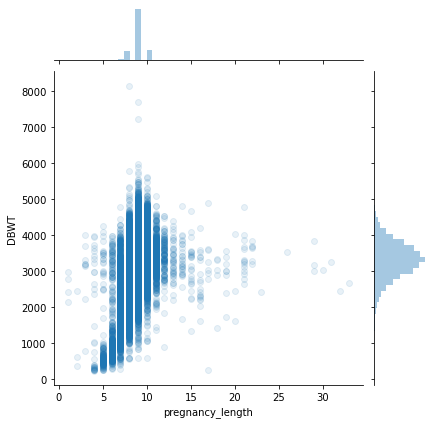

In [157]:
sns.jointplot(x='pregnancy_length', y='DBWT', data=df, kind='scatter', alpha=0.1)

In [202]:
df['pregnancy_length_log'] = np.sqrt(df['pregnancy_length'])

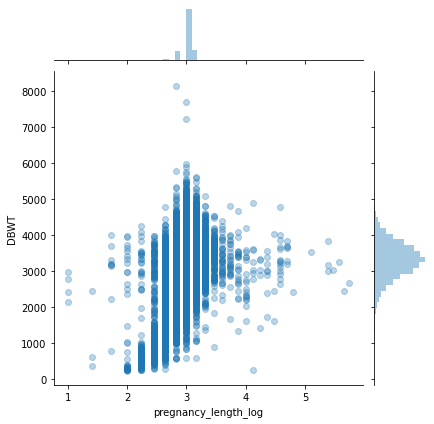

In [205]:
sns.jointplot(x='pregnancy_length_log', y='DBWT', data=df, kind='scatter', alpha=0.3)

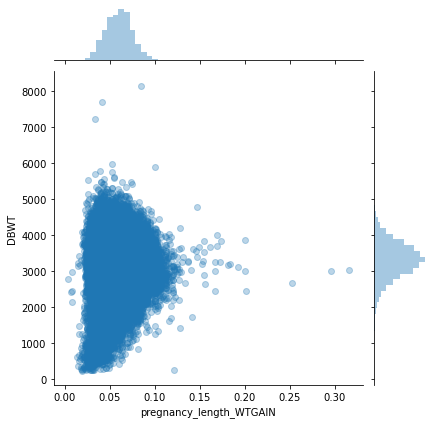

In [149]:
sns.jointplot(x='pregnancy_length_WTGAIN', y='DBWT', data=df, kind='scatter', alpha=0.3)

In [164]:
df['MOM_weight'] = (df['M_Ht_In']**2)*df['BMI']/704

In [175]:
df['WTGAIN_div_MOM_weight'] = df['WTGAIN']/df['MOM_weight']

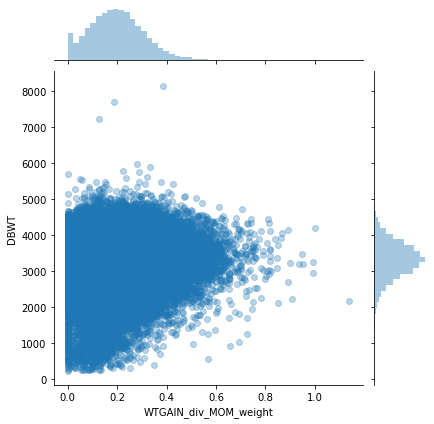

In [190]:
sns.jointplot(x='WTGAIN_div_MOM_weight', y='DBWT', data=df, kind='scatter', alpha=0.3)

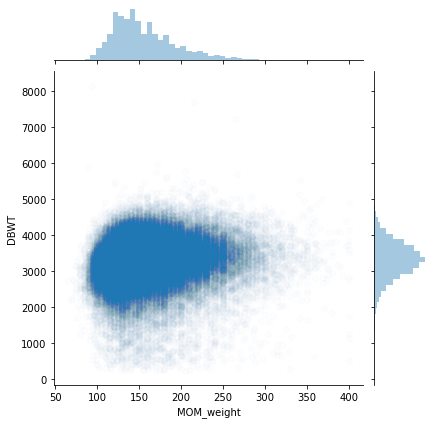

In [195]:
sns.jointplot(x='MOM_weight', y='DBWT', data=df, kind='scatter', alpha=0.01)

In [193]:
df['WTGAIN'].value_counts()

30    4084
20    3012
25    2869
35    2690
40    2517
32    2292
28    2250
33    2245
27    2210
0     2171
31    2156
23    2139
24    2106
22    2104
26    2085
34    2040
29    2027
36    1843
21    1748
37    1671
15    1635
38    1630
18    1521
19    1437
39    1426
45    1408
17    1369
42    1259
16    1257
41    1245
10    1174
14    1132
43    1108
50    1067
44    1050
13    1040
12     993
46     892
11     874
47     782
48     762
49     650
8      639
9      634
55     561
6      540
5      535
7      521
52     503
51     492
53     443
4      430
54     421
60     407
2      368
3      359
56     325
1      310
58     298
57     292
65     218
59     216
62     211
61     170
70     169
64     139
63     138
98     113
67     104
66     103
68      98
75      78
69      77
80      58
71      57
72      55
73      54
76      41
74      41
78      35
77      33
83      24
85      24
81      24
82      20
90      20
79      19
88      17
86      15
95      14
84      12

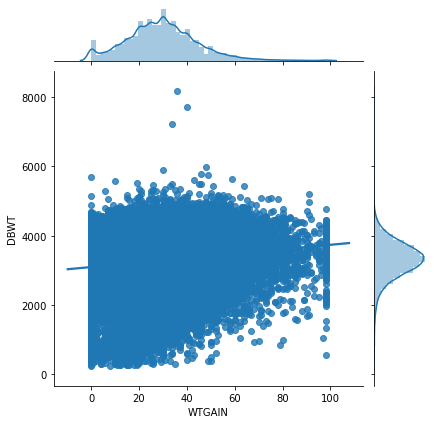

In [206]:
sns.jointplot(x='WTGAIN',y='DBWT', data=df, kind='reg')

In [214]:
df['WTGAIN_div_length'] = df['WTGAIN'] / df['pregnancy_length']

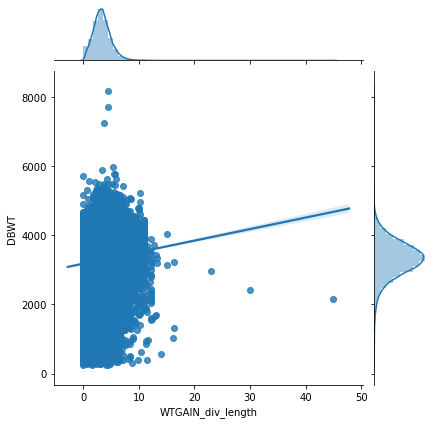

In [215]:
sns.jointplot(x='WTGAIN_div_length',y='DBWT', data=df, kind='reg')

In [238]:
df['Weight_before'] = df['MOM_weight'] - df['WTGAIN']

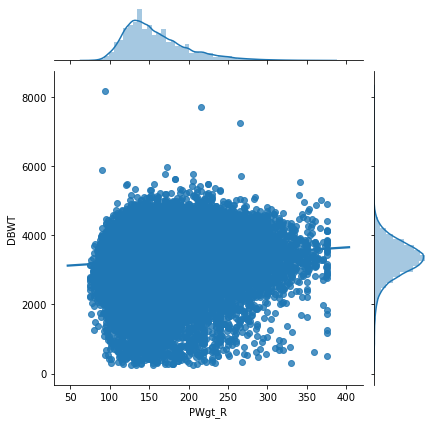

In [240]:
sns.jointplot(x='PWgt_R',y='DBWT', data=df, kind='reg')

In [242]:
df['WT_percent_gain'] = df['WTGAIN'] / df['PWgt_R']

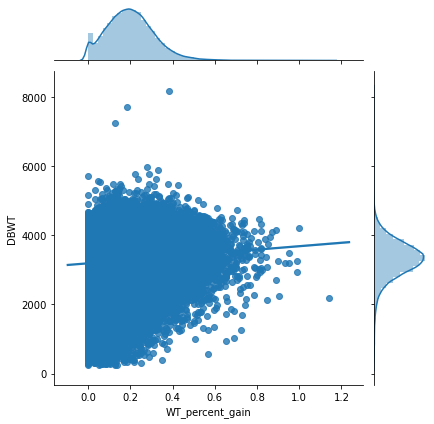

In [243]:
sns.jointplot(x='WT_percent_gain',y='DBWT', data=df, kind='reg')

In [263]:
conditions = [df['MAGER'].lt(18)
             
    
]
choices = ['Minor'
           
    
]

df['MAGER_cat'] = np.select(conditions,choices,'Adult')

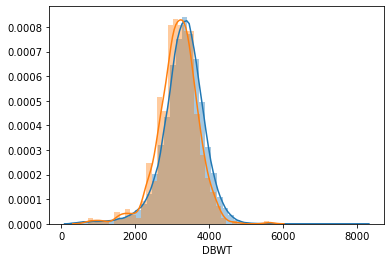

In [264]:
sns.distplot(df[df['MAGER_cat'].eq('Adult')]['DBWT'])
sns.distplot(df[df['MAGER_cat'].eq('Minor')]['DBWT'])
# sns.distplot(df[df['MAGER_cat'].eq('Mature')]['DBWT'])

In [387]:
X = df[['ATTEND','BFACIL', 'smoked', 'DOB_MM', 'DMAR','FAGECOMB','FHISPX','FEDUC', 'FRACE6', 'first_birth', 'plural_delivery', 'first_pregnancy', 'plural_delivery', 'first_natal',
        'IP_GON', 'LD_INDL', 'MAGER', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN', 'pregnancy_length', 'WTGAIN_div_MOM_weight','WTGAIN_div_length',
        'NO_INFEC','NO_MMORB','NO_RISKS','PAY', 'PAY_REC','PRECARE','PREVIS', 'PRIORDEAD_cat', 'PRIORLIVE_cat', 'PRIORTERM_cat', 'PWgt_R', 'BMI_log','M_Ht_In', 'MOM_weight',
        'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX', 'WTGAIN','WT_percent_gain','MAGER_cat'
]]
_X = pd.get_dummies(X, columns=['ATTEND', 'BFACIL','smoked', 'DOB_MM','DMAR','FHISPX','FEDUC','FRACE6', 'plural_delivery',
                                'IP_GON','LD_INDL', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN',
                                'NO_INFEC','NO_MMORB','NO_RISKS', 'PAY', 'PAY_REC','PRIORDEAD_cat', 'PRIORLIVE_cat','PRIORTERM_cat',
                                'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX','MAGER_cat'])
y = df['DBWT']

In [388]:
# list(_X.columns)

In [389]:
_X['MAGER_smoked_Daily'] = _X['MAGER'] * _X['smoked_Daily']
_X['NO_RISKS_1_length'] = _X['NO_RISKS_1'] * _X['pregnancy_length']
# _X['SEX_M_WTGAIN'] = _X['SEX_M'] * _X['WTGAIN']
_X['RDMETH_REC_3_length'] = _X['RDMETH_REC_3'] * _X['pregnancy_length']
_X['RDMETH_REC_1_length'] = _X['RDMETH_REC_1'] * _X['pregnancy_length']

In [377]:
# _X['DBWT'] = y
from statsmodels.formula.api import ols
formula = 'DBWT~BMI_log+WTGAIN+M_Ht_In+smoked_None+smoked_None+SEX_M+BFACIL_1+ATTEND_1+DMAR_1+FRACE6_1+FEDUC_3+FRACE6_1+first_birth+plural_delivery_0+first_natal+LD_INDL_N\
+MBSTATE_REC_1+MEDUC_6+MHISPX_0+MRAVE6_2+MRAVE6_1+MTRAN_Y+NO_RISKS_1+PAY_1+PRECARE+PREVIS+PRIORDEAD_cat_Yes+RDMETH_REC_3+RF_CESAR_Y+MAGER_smoked_Daily+pregnancy_length+MOM_weight\
+WTGAIN_div_MOM_weight+WTGAIN_div_length+NO_RISKS_1_length+RDMETH_REC_3_length+RDMETH_REC_1_length'
model = ols(formula=formula, data=_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DBWT   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     995.6
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:42:53   Log-Likelihood:            -6.2679e+05
No. Observations:               82497   AIC:                         1.254e+06
Df Residuals:                   82461   BIC:                         1.254e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6589.6030    257.429    -25.598      0.000   -7094.163   -6085.043
BMI_log                1275.7322     55.899     22.822      0.000    1166.170    1385.294
WTGAIN                    5.7181      0.928      6.160      0.000       3.899       7.537
M_Ht_In                  52.6051      1.811     29.040      0.000      49.055      56.155
smoked_None              63.1277     23.510      2.685      0.007      17.048     109.208
SEX_M                   113.8047      3.366     33.814      0.000     107.208     120.401
BFACIL_1               -116.6081     13.715     -8.502      0.000    -143.489     -89.727
ATTEND_1                -32.6853      4.457     -7.333      0.000     -41.421     -23.950
DMAR_1                    9.6427      3.862      2.497      0.013       2.072      17.213
FRACE6_1                 49.9604      5.035      9.922      0.000      40.092      59.829
FEDUC_3                 -16.6569      3.923     -4.246      0.000     -24.346      -8.968
first_birth            -119.8786      3.900    -30.736      0.000    -127.523    -112.234
plural_delivery_0[0]    390.0233      7.652     50.972      0.000     375.026     405.021
plural_delivery_0[1]    390.0233      7.652     50.972      0.000     375.026     405.021
first_natal               9.3141      3.846      2.421      0.015       1.775      16.853
LD_INDL_N               -32.2551      3.986     -8.093      0.000     -40.067     -24.443
MBSTATE_REC_1           -50.8896      4.583    -11.103      0.000     -59.873     -41.907
MEDUC_6                  17.2063      4.312      3.990      0.000       8.754      25.658
MHISPX_0                  7.3703      4.694      1.570      0.116      -1.830      16.571
MRAVE6_2               -112.0374      7.340    -15.264      0.000    -126.424     -97.651
MRAVE6_1                 38.2937      6.680      5.733      0.000      25.201      51.386
MTRAN_Y                -508.6829     26.590    -19.131      0.000    -560.799    -456.567
NO_RISKS_1              663.6699     47.028     14.112      0.000     571.495     755.845
PAY_1                   -25.1386      4.026     -6.245      0.000     -33.029     -17.248
PRECARE                  18.3700      1.224     15.013      0.000      15.972      20.768
PREVIS                   11.1355      0.429     25.975      0.000      10.295      11.976
PRIORDEAD_cat_Yes      -111.6213     16.163     -6.906      0.000    -143.300     -79.943
RDMETH_REC_3          -1889.7495     48.944    -38.610      0.000   -1985.680   -1793.819
RF_CESAR_Y             -420.9711     51.284     -8.209      0.000    -521.487    -320.455
MAGER_smoked_Daily       -2.8673      0.850     -3.373      0.001      -4.534      -1.201
pregnancy_length        258.8669      5.669     45.662      0.000     247.755     269.979
MOM_weight             

In [ ]:
_X.columns


In [ ]:
# poly_2 = PolynomialFeatures(degree=2, include_bias=False)
# poly2_data = poly_2.fit_transform(_X)
# poly2_columns = poly_2.get_feature_names(_X.columns)
# df_poly2 = pd.DataFrame(poly2_data, columns = poly2_columns)
# df_poly2.shape

In [ ]:
# _df = _X.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# _df['pairs'] = list(zip(_df.level_0, _df.level_1))
# _df.set_index(['pairs'], inplace=True)
# _df.drop(columns =['level_1', 'level_0'], inplace=True)
# _df.columns = ['cc']
# _df.drop_duplicates(inplace=True)
# _to_remove = _df[(_df.cc>.75) & (_df.cc<1)]
# _to_remove

In [ ]:
_X

In [ ]:
# poly_2 = PolynomialFeatures(degree=2, include_bias=False)
# poly2_data = poly_2.fit_transform(_X)
# poly2_columns = poly_2.get_feature_names(_X.columns)
# df_poly2 = pd.DataFrame(poly2_data, columns = poly2_columns)
# df_poly2.shape

In [378]:
_X.shape

(82497, 170)

In [390]:
X_train, X_test, y_train, y_test = train_test_split(_X, y, random_state = 42, test_size= 0.2)


In [391]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns = _X.columns)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(data=X_test, columns = _X.columns)

In [392]:
# _X.corr()

In [393]:
lasso_cv = LassoCV(cv=5, random_state=42, verbose=1)
lasso_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
....................................................................................................................................................................................................C:\Users\albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1967207.8389015198, tolerance: 1723752.4908968157
  tol, rng, random, positive)
................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.8s finished
C:\Users\albert\Anaconda3\lib\site-packages\sklearn\linear_mod

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=42, selection='cyclic',
        tol=0.0001, verbose=1)

In [394]:
y_train_pred = lasso_cv.predict(X_train)
y_test_pred = lasso_cv.predict(X_test)

In [395]:
np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

480.4142603594036

In [396]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

483.24353771057264

In [397]:
lasso_cv.score(X_train, y_train)

0.300287608020571

In [360]:
y.describe()

count    82497.000000
mean      3287.639938
std        575.389512
min        246.000000
25%       2990.000000
50%       3320.000000
75%       3645.000000
max       8165.000000
Name: DBWT, dtype: float64

In [361]:
_coef_df = pd.DataFrame()
_coef_df['variables'] = _X.columns
_coef_df['coefficients'] = lasso_cv.coef_
_coef_df.sort_values(by='coefficients')

,variables,coefficients
148,RDMETH_REC_3,-5.345098e+02
121,NO_RISKS_0,-3.391074e+02
165,NO_RISKS_1_length,-2.857665e+02
13,MOM_weight,-1.457641e+02
160,SEX_F,-5.525624e+01
140,PRIORLIVE_cat_None,-5.268933e+01
7,WTGAIN_div_length,-5.183898e+01
107,MRAVE6_2,-4.641459e+01
114,MTRAN_Y,-3.402803e+01
157,RF_CESAR_N,-2.672713e+01


In [362]:
_coef_df['coefficients'].describe()

count    167.000000
mean       2.270878
std       83.704560
min     -534.509833
25%       -2.194518
50%       -0.000000
75%        2.470449
max      667.738925
Name: coefficients, dtype: float64

In [363]:
# _coef_df.sort_values(by='coefficients').to_csv('_coef_df2.csv', index=False,header=True)

In [364]:
X

,ATTEND,BFACIL,smoked,DOB_MM,DMAR,FAGECOMB,FHISPX,FEDUC,FRACE6,first_birth,plural_delivery,first_pregnancy,plural_delivery,first_natal,IP_GON,LD_INDL,MAGER,35AGE_older,MAR_IMP,MBSTATE_REC,MEDUC,MHISPX,MRAVE6,MTRAN,pregnancy_length,WTGAIN_div_MOM_weight,WTGAIN_div_length,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PAY_REC,PRECARE,PREVIS,PRIORDEAD_cat,PRIORLIVE_cat,PRIORTERM_cat,PWgt_R,BMI_log,M_Ht_In,MOM_weight,RDMETH_REC,RESTATUS,RF_CESAR,SEX,WTGAIN,WT_percent_gain,MAGER_cat
2745564,1,1,None,7,1,36,0,5,1,0,0,0,0,1,N,N,34,0,,1,6,0,1,N,9,0.161616,2.777778,1,1,1,2,2,2,12,None,Yes,None,155,3.218876,66,154.687500,1,2,N,F,25,0.161290,Adult
3083465,1,1,None,4,1,25,1,4,1,1,0,0,0,0,N,N,25,0,,1,3,0,1,N,8,0.041360,1.125000,1,1,1,2,2,3,13,None,None,Yes,218,3.621671,64,217.600000,1,1,N,F,9,0.041284,Adult
64636,1,1,None,12,1,33,0,6,1,0,0,0,0,0,N,N,30,0,,1,4,0,1,N,8,0.071439,1.375000,1,1,0,1,1,1,11,None,Yes,Yes,154,3.339322,62,153.978409,4,1,Y,F,11,0.071429,Adult
1898366,1,1,None,4,1,43,0,3,1,0,0,0,0,1,N,Y,37,1,,1,7,0,1,N,8,0.279074,4.000000,1,1,0,2,2,2,10,None,Yes,None,115,3.044522,62,114.664773,1,2,N,F,32,0.278261,Adult
1837169,1,1,None,4,2,52,0,3,2,0,0,0,0,0,N,N,31,0,,1,3,0,2,N,10,0.000000,0.000000,1,1,1,1,1,3,14,None,Yes,Yes,193,3.499533,64,192.581818,1,1,N,F,0,0.000000,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418357,1,1,None,3,1,30,0,6,4,1,0,1,0,1,N,N,31,0,,2,6,0,4,N,9,0.404792,5.111111,1,1,1,5,4,2,14,None,None,None,114,3.068053,61,113.638494,3,1,N,M,46,0.403509,Adult
148545,2,1,None,8,2,29,1,2,1,1,0,0,0,0,N,N,23,0,,1,2,1,1,N,9,0.120781,2.333333,1,1,0,1,1,2,15,None,None,Yes,174,3.335770,66,173.868750,1,1,N,M,21,0.120690,Adult
3393158,1,1,None,9,2,33,9,4,4,0,0,0,0,1,N,N,28,0,,2,4,9,4,N,9,0.236500,2.888889,1,1,0,1,1,4,6,None,Yes,None,110,2.970414,63,109.936790,1,1,N,M,26,0.236364,Adult
3150640,1,1,None,6,2,18,1,1,1,1,0,1,0,1,N,N,18,0,,1,3,1,1,N,9,0.075214,1.000000,1,1,1,1,1,0,0,None,None,None,120,3.152736,60,119.659091,3,1,N,M,9,0.075000,Adult


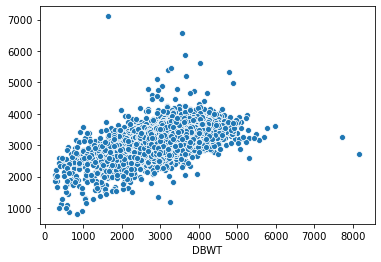

In [365]:
sns.scatterplot(y_test,y_test_pred)

In [ ]:
# _coef_df.to_csv('_coef_df.csv',index=False, header=True)

In [ ]:
df.shape

In [ ]:
df['FAGECOMB'].value_counts()

In [ ]:
df['MRAVE6'].value_counts()

In [ ]:
X

In [ ]:
df['NO_INFEC'].value_counts()

In [ ]:
df.shape

In [ ]:
df['CIG_0'].value_counts()